In [ ]:
CLOUD DEPLOYMENT

In [ ]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras import layers
from keras.layers import Dense,Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
(X_train,y_train),(X_test,y_test) =mnist.load_data()
print(X_train.shape)
print(X_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


The label value is  6


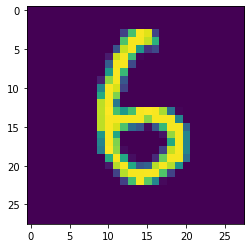

In [ ]:
print("The label value is ",y_test[21])
plt.imshow(X_test[21])

The label value is  1


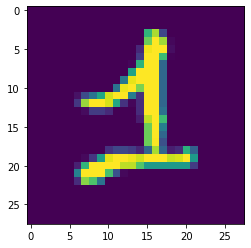

In [ ]:
print("The label value is ",y_train[24])
plt.imshow(X_train[24])

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [ ]:
number_of_classes= 10
y_train = np_utils.to_categorical(y_train,number_of_classes)
y_test = np_utils.to_categorical(y_test,number_of_classes)

In [ ]:
print("After encoding the value 6 of y_test[21] become", y_test[21])

After encoding the value 6 of y_test[21] become [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [ ]:
model= tf.keras.Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(number_of_classes,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer="Adam", metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='accuracy',
                        patience=3)
reduce_lr = ReduceLROnPlateau(monitor='accuracy',
                        patience=3,
                        factor=0.5,min_lr=0.00001)

callback = [reduce_lr,early_stopping]

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),epochs=15,batch_size=32,callbacks=callback)

Epoch 1/15
1875/1875 [==============================] - 174s 93ms/step - loss: 0.1186 - accuracy: 0.9666 - val_loss: 0.0951 - val_accuracy: 0.9736 - lr: 0.0010
Epoch 2/15
1875/1875 [==============================] - 172s 92ms/step - loss: 0.0591 - accuracy: 0.9820 - val_loss: 0.0826 - val_accuracy: 0.9779 - lr: 0.0010
Epoch 3/15
1875/1875 [==============================] - 176s 94ms/step - loss: 0.0440 - accuracy: 0.9860 - val_loss: 0.1151 - val_accuracy: 0.9695 - lr: 0.0010
Epoch 4/15
1875/1875 [==============================] - 176s 94ms/step - loss: 0.0342 - accuracy: 0.9889 - val_loss: 0.0950 - val_accuracy: 0.9766 - lr: 0.0010
Epoch 5/15
1875/1875 [==============================] - 181s 97ms/step - loss: 0.0245 - accuracy: 0.9927 - val_loss: 0.0783 - val_accuracy: 0.9811 - lr: 0.0010
Epoch 6/15
1875/1875 [==============================] - 178s 95ms/step - loss: 0.0257 - accuracy: 0.9928 - val_loss: 0.0970 - val_accuracy: 0.9799 - lr: 0.0010
Epoch 7/15
1875/1875 [==================

In [ ]:
metrics=model.evaluate(X_test,y_test,verbose=0)
print("loss & accuracy")
print(metrics)

loss & accuracy
[0.3288283348083496, 0.9778000116348267]


In [ ]:
prediction=model.predict(X_test[:4])
print(np.argmax(prediction,axis=1))
print(y_test[:4])

1/1 [==============================] - 0s 94ms/step
[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
model.save('digit-recognition.h5')

In [ ]:
!tar -zcvf digit-recognition.tar digit-recognition.h5

digit-recognition.h5


In [ ]:
!pip install ibm_watson_machine_learning
!pip install watson-machine-learning-client

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 8.5 MB/s 
     |████████████████████████████████| 51 kB 946 kB/s 
     |████████████████████████████████| 824 kB 55.9 MB/s 
     |████████████████████████████████| 133 kB 54.6 MB/s 
     |████████████████████████████████| 547 kB 54.9 MB/s 
  Created wheel for ibm-cos-sdk: filename=ibm_cos_sdk-2.7.0-py2.py3-none-any.whl size=72564 sha256=42d0da6c0617df5e956bb0d07bd02c58d37a84a7a68352e9deaf3ddf40b01f9e
  Stored in directory: /root/.cache/pip/wheels/47/22/bf/e1154ff0f5de93cc477acd0ca69abfbb8b799c5b28a66b44c2
  Created wheel for ibm-cos-sdk-core: filename=ibm_cos_sdk_core-2.7.0-py2.py3-none-any.whl size=501013 sha256=fb956dbe1ccf2003a594b846988f62c71e6e063afe7a1e5faefeca50b22c4395
  Stored in directory: /root/.cache/pip/wheels/6c/a2/e4/c16d02f809a3ea998e17cfd02c13369281f3d232aaf5902c19
  Created wheel for ibm-cos-sdk-s3transfer: filename=ibm_cos_

In [1]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"mXnZA6alXjP7nBHb2MhUPvhXgLMo3f9rrj094TbXWv44"
}
client = APIClient(credentials)
client

Python 3.7 and 3.8 frameworks are deprecated and will be removed in a future release. Use Python 3.9 framework instead.


In [2]:
client.spaces.get_details()

{'resources': [{'entity': {'compute': [{'crn': 'crn:v1:bluemix:public:pm-20:us-south:a/cec083d33451444c9bdfbd8a8e68291d:db32e8a0-571b-456d-bfb7-b83d8e756301::',
      'guid': 'db32e8a0-571b-456d-bfb7-b83d8e756301',
      'name': 'Watson Machine Learning-uu',
      'type': 'machine_learning'}],
    'description': '',
    'name': 'Digit Recognition Deploy',
    'scope': {'bss_account_id': 'cec083d33451444c9bdfbd8a8e68291d'},
    'stage': {'production': False},
    'status': {'state': 'active'},
    'storage': {'properties': {'bucket_name': '309ed175-951a-4207-ad64-06cb7532d89e',
      'bucket_region': 'us-south',
      'credentials': {'admin': {'access_key_id': 'b8d969e17ac94bba9e5796898ad55bdd',
        'api_key': 'YOIs8ACBZPHx_YJnMIkItYHteMz6leUrSBQcVZcllU-F',
        'secret_access_key': 'f116083c6d4898ece2247ffc97e4af607451ca8d20755b7c',
        'service_id': 'ServiceId-ba6e3abe-76ec-4bd9-ad8f-50319827eb10'},
       'editor': {'access_key_id': '494a8d8e4e6243ec95c34d93e9707aac',
    

In [3]:
def guid_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [4]:
space_uid = guid_space_name(client,'Digit Recognition Deploy')
space_uid

'0505f5e8-00b9-481c-aefc-438df31a63c9'

In [5]:
client.set.default_space(space_uid)

'SUCCESS'

In [6]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [7]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid


'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [8]:
model_details = client.repository.store_model(model='digit-recognition.tar',meta_props={
    client.repository.ModelMetaNames.NAME:"CNN Digit recognition model repo",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [9]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-10-29T18:18:15.410Z',
  'id': '00fe0261-bab5-4b80-8e70-d0f4a93f2811',
  'modified_at': '2022-10-29T18:18:19.003Z',
  'name': 'CNN Digit recognition model repo',
  'owner': 'IBMid-663003ZMCA',
  'resource_key': '56da2402-21a2-4e14-ad27-949232fa731e',
  'space_id': '0505f5e8-00b9-481c-aefc-438df31a63c9'},
 'system': {'warnings': []}}

In [10]:
model_id = client.repository.get_model_id(model_details)
model_id

'00fe0261-bab5-4b80-8e70-d0f4a93f2811'

In [11]:
client.repository.download(model_id,'DigitRecog_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecog_IBM_model.tar.gz'


'/content/DigitRecog_IBM_model.tar.gz'